# *Importing Libraries*

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## *Loading the dataset*

In [44]:
df = pd.read_csv("Student.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [23]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [45]:
df.shape

(395, 33)

In [46]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [47]:
# Checking for Missing Values:

print("\nMissing Values")
df.isnull().sum()


Missing Values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### **Removing duplicates:**

In [48]:
print("\nNumber of duplicates rows:",df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicates rows: 0


### **Descriptive Statistics:**

In [49]:
print("\nSummary of cleaned dataset:")
df.describe()


Summary of cleaned dataset:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [50]:
import pandas as pd

df = pd.read_csv("Student.csv")

# Columns to drop 
drop_columns = ['address', 'famsize', 'Pstatus', 'reason', 'guardian', 'nursery']

df = df.drop(columns=[col for col in drop_columns if col in df.columns])

print("Columns after dropping:")
print(df.columns.tolist())

Columns after dropping:
['school', 'sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [51]:
df.shape

(395, 27)

# Checking Outliers :

age Outliers Count: 1


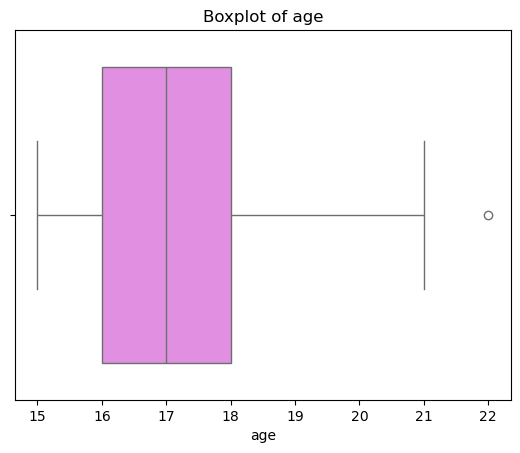

In [52]:
col = 'age'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

Medu Outliers Count: 0


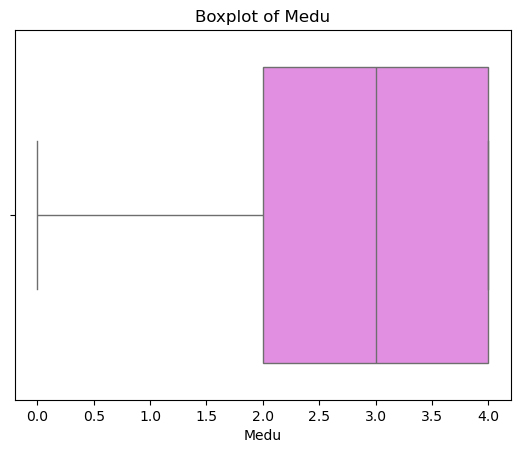

In [53]:
col = 'Medu'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

Fedu Outliers Count: 2


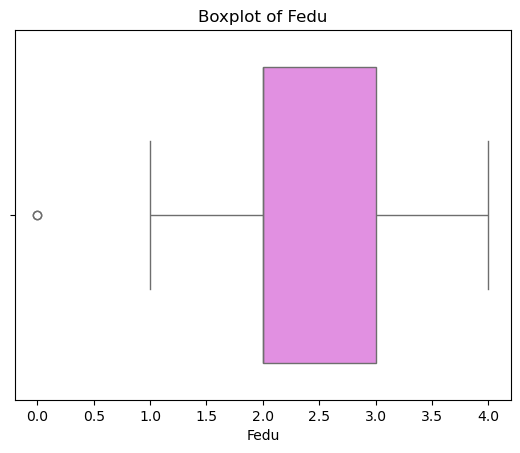

In [54]:
col = 'Fedu'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

traveltime Outliers Count: 8


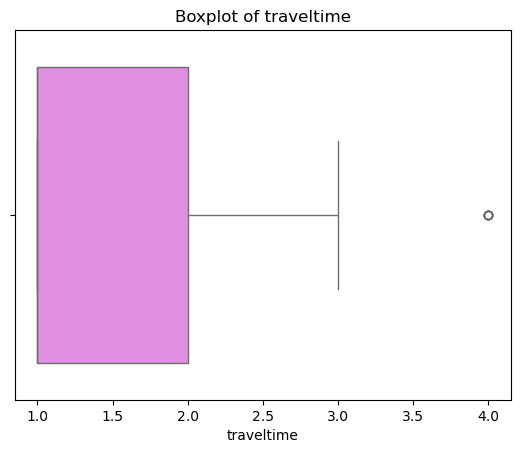

In [55]:
col = 'traveltime'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

studytime Outliers Count: 27


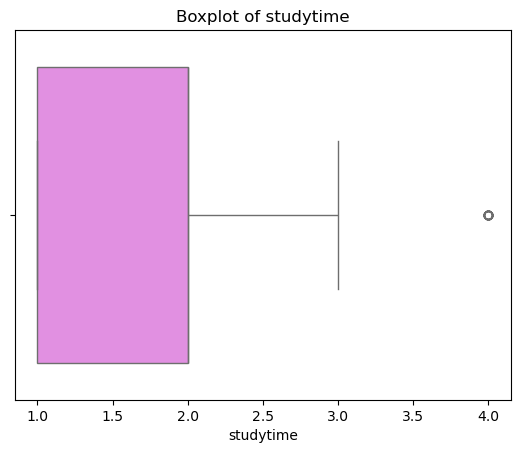

In [56]:
col = 'studytime'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

absences Outliers Count: 15


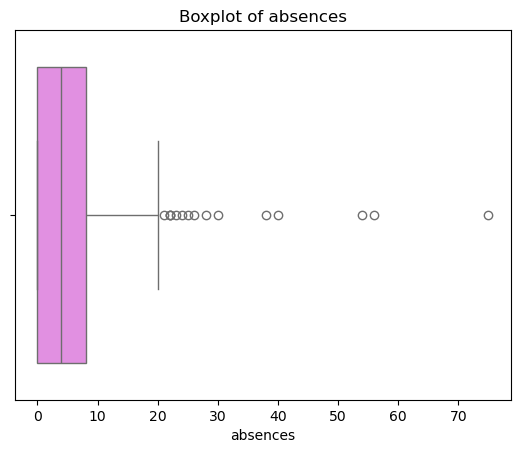

In [57]:
col = 'absences'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

failures Outliers Count: 83


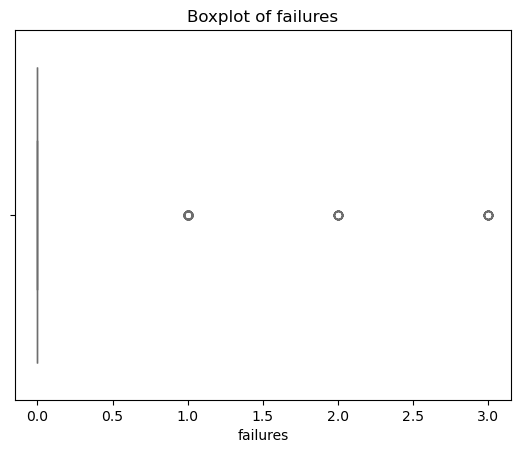

In [58]:
col = 'failures'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

famrel Outliers Count: 26


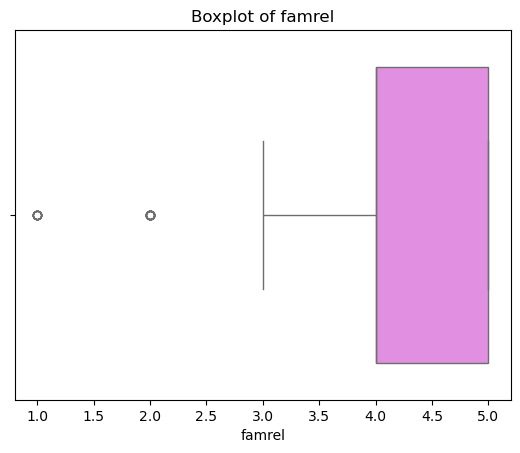

In [59]:
col = 'famrel'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

freetime Outliers Count: 19


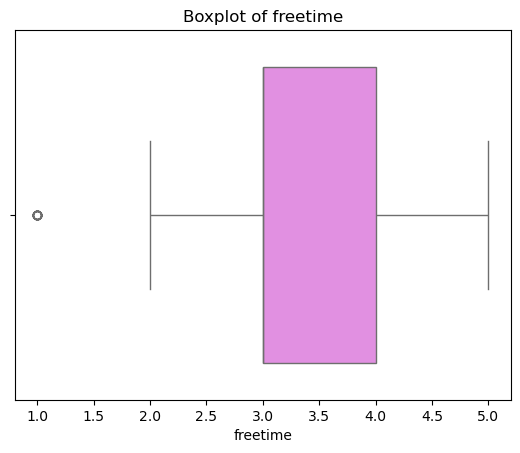

In [60]:
col = 'freetime'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

goout Outliers Count: 0


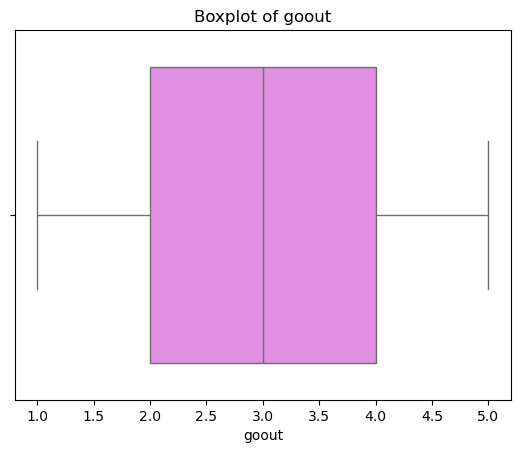

In [61]:
col = 'goout'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

Dalc Outliers Count: 18


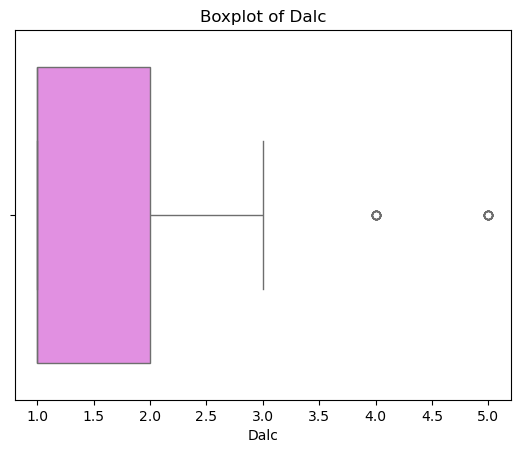

In [62]:
col = 'Dalc'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

Walc Outliers Count: 0


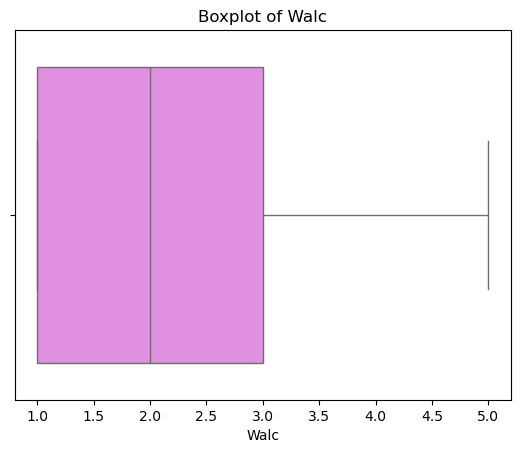

In [63]:
col = 'Walc'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

health Outliers Count: 0


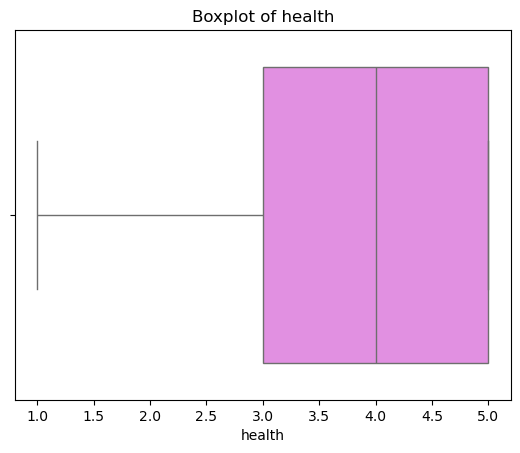

In [64]:
col = 'health'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

G1 Outliers Count: 0


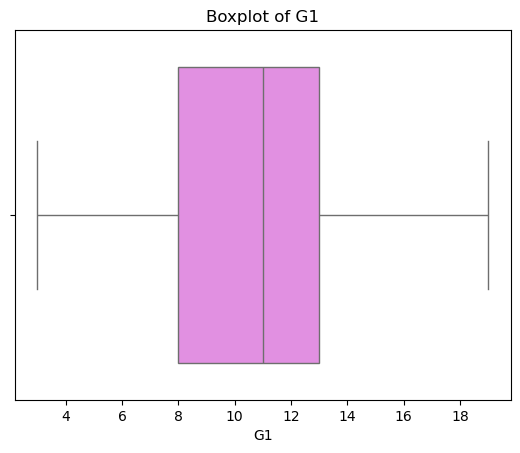

In [65]:
col = 'G1'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

G2 Outliers Count: 13


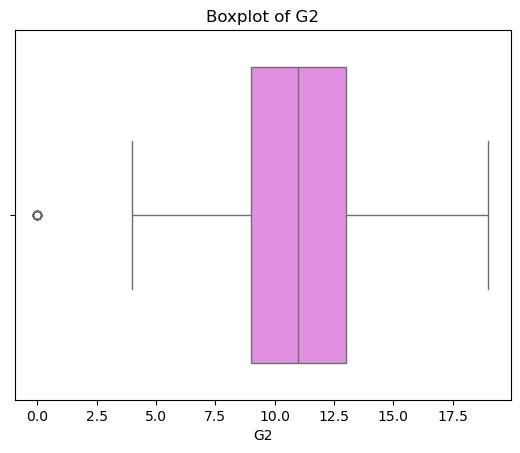

In [66]:
col = 'G2'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

G3 Outliers Count: 0


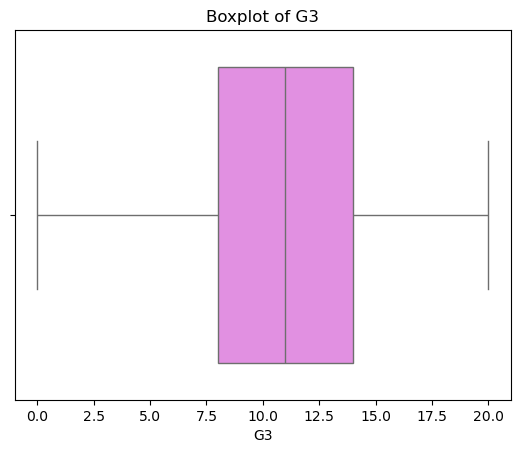

In [67]:
col = 'G3'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print(f"{col} Outliers Count:", len(outliers))
sns.boxplot(x=df[col], color='violet')
plt.title(f"Boxplot of {col}")
plt.show()

- *The outliers are Age-1,Medu-0,Fedu-2,Traveltime-8,Studytime-27,Failure-83,famrel-26,freetime-19,goout-0,dalc-18,walc-0,health-0,absence-15,G1-0,G2-13,G3-0*

## *Handling Outlier:*

In [68]:
import pandas as pd

# Your numeric columns
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                'health', 'absences', 'G1', 'G2', 'G3']

# Convert all to numeric (important!)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Function to count outliers using IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

# Count before replacement
before = {col: count_outliers(df[col]) for col in numeric_cols}

# Replace outliers with median
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    df.loc[(df[col] < lower) | (df[col] > upper), col] = median

# Count after replacement
after = {col: count_outliers(df[col]) for col in numeric_cols}

# Display before, after, and replaced counts
print("Column\t\tBefore\tAfter\tReplaced")
print("-"*40)
for col in numeric_cols:
    replaced = before[col] - after[col]
    print(f"{col:12}\t{before[col]}\t{after[col]}\t{replaced}")

Column		Before	After	Replaced
----------------------------------------
age         	1	0	1
Medu        	0	0	0
Fedu        	2	0	2
traveltime  	8	0	8
studytime   	27	0	27
failures    	83	0	83
famrel      	26	0	26
freetime    	19	0	19
goout       	0	0	0
Dalc        	18	0	18
Walc        	0	0	0
health      	0	0	0
absences    	15	10	5
G1          	0	0	0
G2          	13	0	13
G3          	0	0	0


### *Interpretation:*

- ***Before** shows how many outliers were found initially.*

- ***After** shows how many are still outliers after replacing them.*

- ***Replaced** = how many values actually got changed.*

- *Outliers in columns like age, Fedu, traveltime, studytime, etc., were successfully replaced with median values.*
- *For columns showing all zeros (Medu, G1, etc.), no statistical outliers existed — so nothing to fix.*
- *Only “absences” still has some outliers left (10). That’s fine — it often has wide variation naturally.*

### *EDA-Exploratory Data Analysis:*

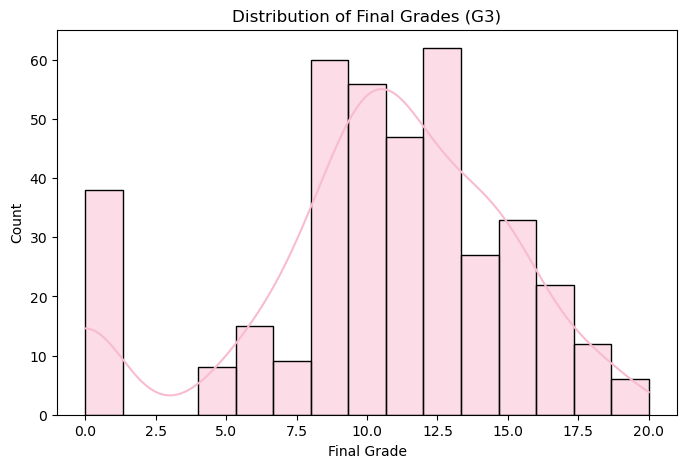

In [69]:
# Overall Distribution of Final Grades (G3)
# Shows grade spread and skewness

plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=15, kde=True, color='#F8BBD0')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

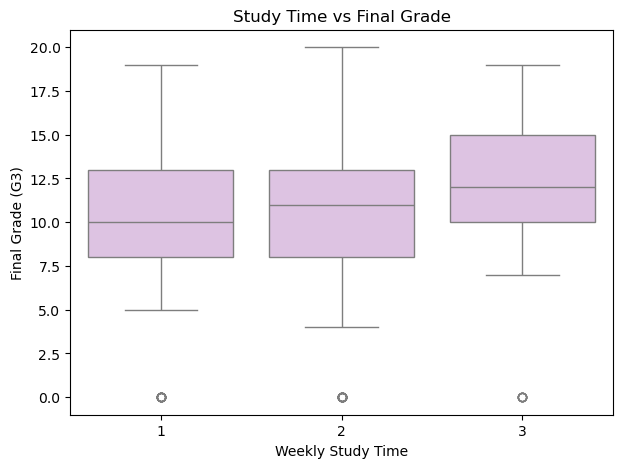

In [70]:
# Study Time vs Final Grade
# Shows how more study time impacts performance

plt.figure(figsize=(7,5))
sns.boxplot(x='studytime', y='G3', data=df, color="#E1BEE7")
plt.title('Study Time vs Final Grade')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

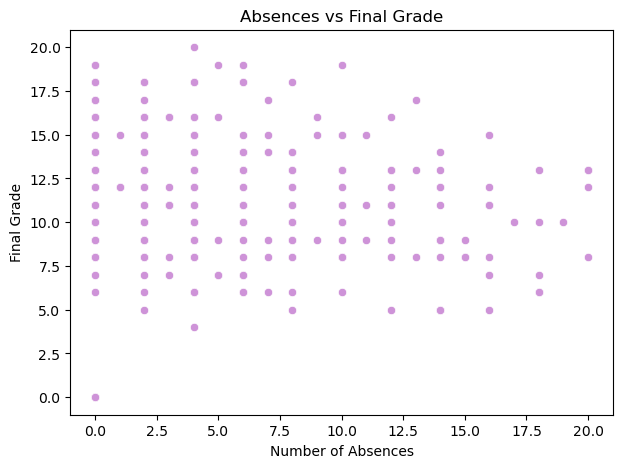

In [31]:
# Absences vs Final Grade
# Helps visualize correlation between attendance and grades

plt.figure(figsize=(7,5))
sns.scatterplot(x='absences', y='G3', data=df, color='#CE93D8')
plt.title('Absences vs Final Grade')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade')
plt.show()

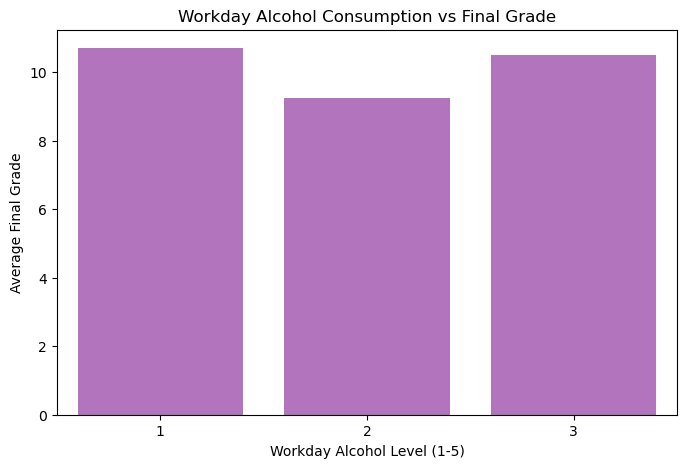

In [71]:
# Alcohol Consumption vs Academic Performance
# Compare average grades by alcohol consumption

plt.figure(figsize=(8,5))
sns.barplot(x='Dalc', y='G3', data=df, ci=None, color="#BA68C8")
plt.title('Workday Alcohol Consumption vs Final Grade')
plt.xlabel('Workday Alcohol Level (1-5)')
plt.ylabel('Average Final Grade')
plt.show()

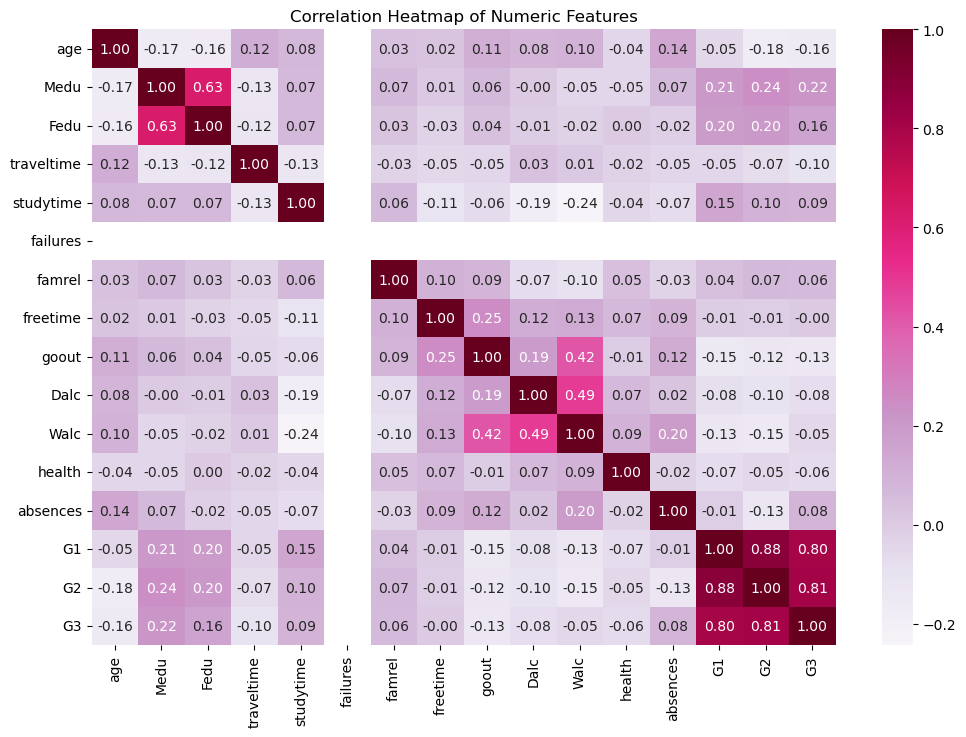

In [33]:
# Correlation Heatmap for Numeric Columns
# Shows which numeric factors most influence grades

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='PuRd', fmt=".2f")#coolwarm
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

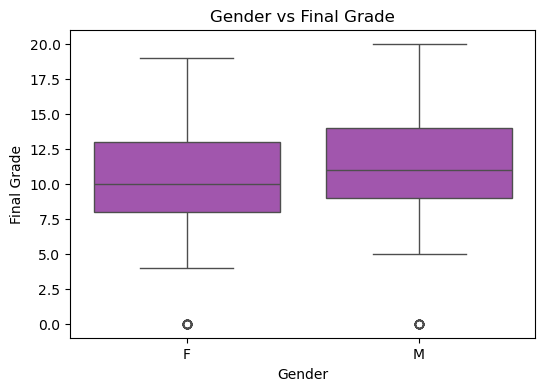

In [72]:
# Gender vs Final Grade
# Visualize if gender affects performance

plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='G3', data=df,color="#AB47BC" )
plt.title('Gender vs Final Grade')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

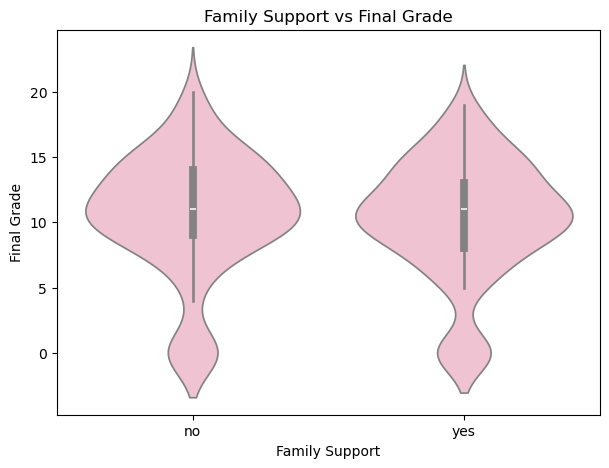

In [73]:
# Family Support vs Final Grade
# Shows how support impacts grades

plt.figure(figsize=(7,5))
sns.violinplot(x='famsup', y='G3', data=df, color="#F8BBD0") #FFF7FA
plt.title('Family Support vs Final Grade')
plt.xlabel('Family Support')
plt.ylabel('Final Grade')
plt.show()

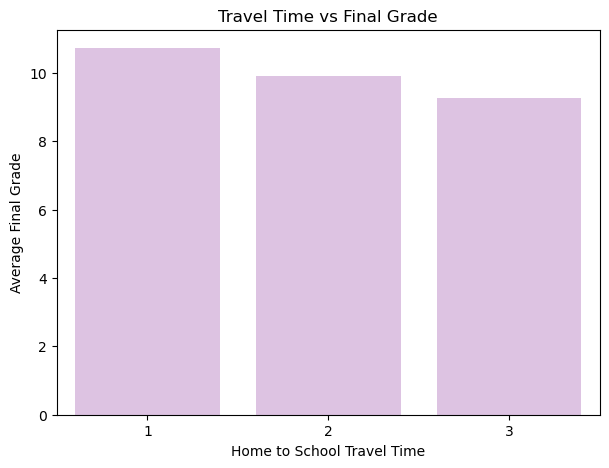

In [74]:
# Travel Time vs Final Grade

plt.figure(figsize=(7,5))
sns.barplot(x='traveltime', y='G3', data=df, ci=None, color="#E1BEE7")
plt.title('Travel Time vs Final Grade')
plt.xlabel('Home to School Travel Time')
plt.ylabel('Average Final Grade')
plt.show()

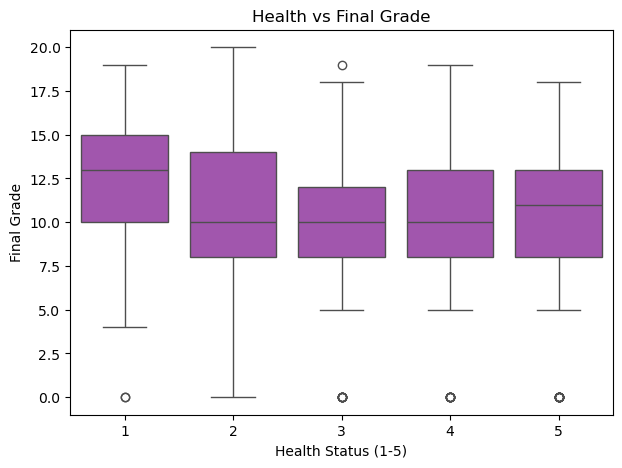

In [39]:
# Health vs Final Grade

plt.figure(figsize=(7,5))
sns.boxplot(x='health', y='G3', data=df, color="#AB47BC")
plt.title('Health vs Final Grade')
plt.xlabel('Health Status (1-5)')
plt.ylabel('Final Grade')
plt.show()

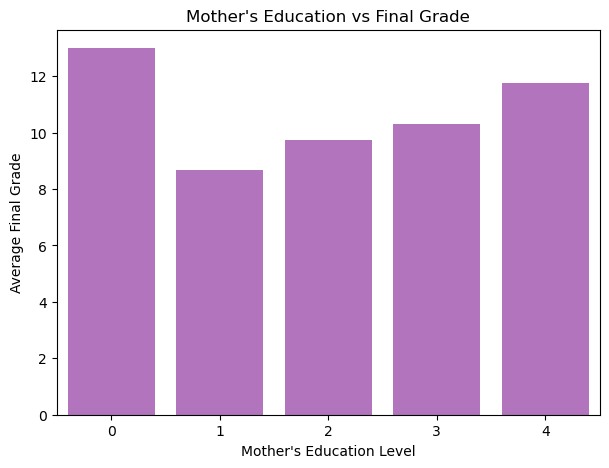

In [75]:
# Mother’s Education vs Final Grade

plt.figure(figsize=(7,5))
sns.barplot(x='Medu', y='G3', data=df, ci=None,color="#BA68C8")
plt.title("Mother's Education vs Final Grade")
plt.xlabel("Mother's Education Level")
plt.ylabel("Average Final Grade")
plt.show()

## **ONE WAY ANOVA TEST :**

In [76]:
from scipy.stats import f_oneway

# One-way ANOVA for mother's education vs final grade
groups = [df[df['Medu'] == i]['G3'] for i in df['Medu'].unique()]
f_stat, p = f_oneway(*groups)

print(f"One-Way ANOVA (Medu vs G3): F = {f_stat:.3f}, p = {p:.4f}")
if p < 0.05:
    print("Significant difference found between groups.")
else:
    print("No significant difference between groups.")

One-Way ANOVA (Medu vs G3): F = 6.088, p = 0.0001
Significant difference found between groups.


## **INDEPENDENT T-TEST :**

In [77]:
from scipy.stats import ttest_ind

# Split data into two groups
male_grades = df[df['sex'] == 'M']['G3']
female_grades = df[df['sex'] == 'F']['G3']

# Perform Independent T-Test
t_stat, p_val = ttest_ind(male_grades, female_grades, equal_var=False)

print(f"Independent T-Test (sex vs G3): t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference: Male and female students have different average final grades.")
else:
    print("No significant difference in final grades between male and female students.")

Independent T-Test (sex vs G3): t = 2.065, p = 0.0396
Significant difference: Male and female students have different average final grades.


In [48]:
import pandas as pd
df = pd.read_excel("Student.csv.xlsx")
X = df.drop(columns=['G3'])  
y = df['G3']                 
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (395, 32)
y shape: (395,)


In [55]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])